In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [3]:
url = "E:\mushroom\mushroom\mushrooms.csv"
names = ("class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat")
dataset = pd.read_csv(url, names = names)
print(dataset.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0  class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment   
1      p          x            s          n        t     p                f   
2      e          x            s          y        t     a                f   
3      e          b            s          w        t     l                f   
4      p          x            y          w        t     p                f   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0  gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring   
1             c          n           k  ...                         s   
2             c          b           k  ...                         s   
3             c          b           n  ...                         s   
4             c          n           n  ...                         s   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0  stalk-c

In [4]:
dataset.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8120,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8121,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8122,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8123,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8124,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8125 entries, 0 to 8124
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8125 non-null   object
 1   cap-shape                 8125 non-null   object
 2   cap-surface               8125 non-null   object
 3   cap-color                 8125 non-null   object
 4   bruises                   8125 non-null   object
 5   odor                      8125 non-null   object
 6   gill-attachment           8125 non-null   object
 7   gill-spacing              8125 non-null   object
 8   gill-size                 8125 non-null   object
 9   gill-color                8125 non-null   object
 10  stalk-shape               8125 non-null   object
 11  stalk-root                8125 non-null   object
 12  stalk-surface-above-ring  8125 non-null   object
 13  stalk-surface-below-ring  8125 non-null   object
 14  stalk-color-above-ring  

In [6]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8125,8125,8125,8125,8125,8125,8125,8125,8125,8125,...,8125,8125,8125,8125,8125,8125,8125,8125,8125,8125
unique,3,7,5,11,3,10,3,3,3,13,...,5,10,10,2,5,4,6,10,7,8
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
dataset.duplicated().sum()

np.int64(0)

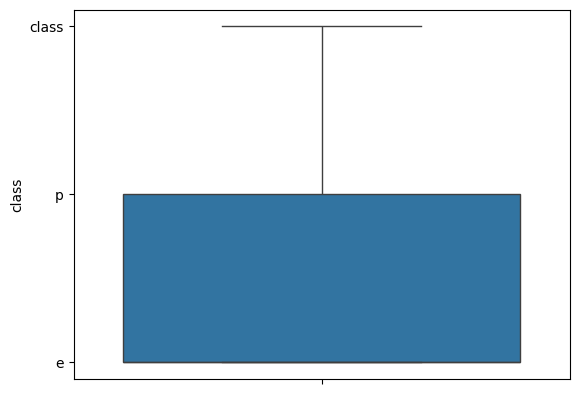

In [9]:
import seaborn as sns
sns.boxplot(dataset['class'])
plt.show()

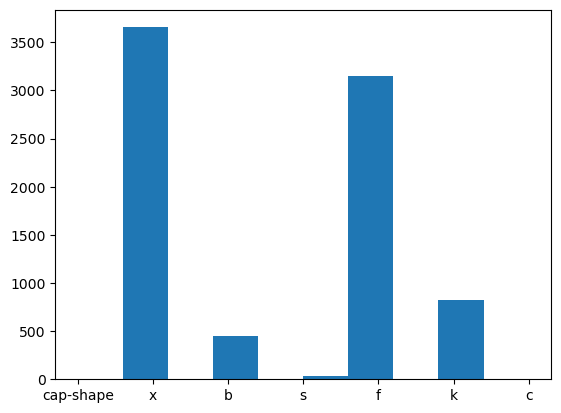

In [10]:
plt.hist(dataset['cap-shape'])
plt.show()

In [11]:
le = LabelEncoder()
dataset['cap-surface'] = le.fit_transform(dataset['cap-surface']) 
print(dataset['cap-surface'].head())
print(dataset['cap-surface'].tail())
dataset['cap-surface'].describe()

0    0
1    3
2    3
3    3
4    4
Name: cap-surface, dtype: int64
8120    3
8121    3
8122    3
8123    4
8124    3
Name: cap-surface, dtype: int64


count    8125.000000
mean        2.827323
std         1.230197
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: cap-surface, dtype: float64

In [12]:
dataset['cap-surface'] = pd.to_numeric(dataset['cap-surface'], errors = 'coerce')

In [13]:
dataset['cap-surface'].head()

0    0
1    3
2    3
3    3
4    4
Name: cap-surface, dtype: int64

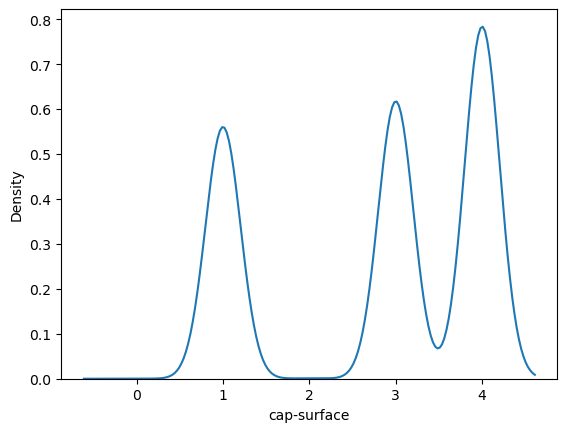

In [14]:
sns.kdeplot(x=dataset['cap-surface'])
plt.show()

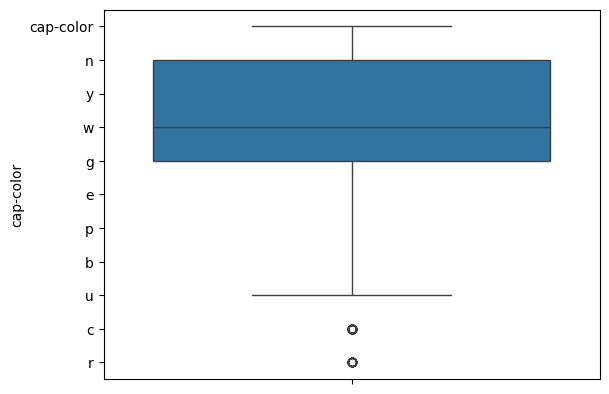

In [15]:
sns.boxplot(dataset['cap-color'])
plt.show()

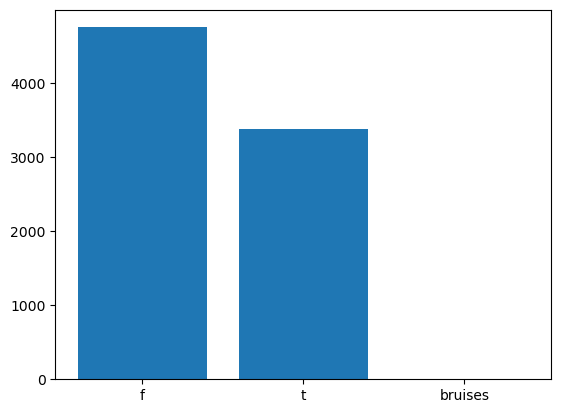

In [25]:
counts = dataset['bruises'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

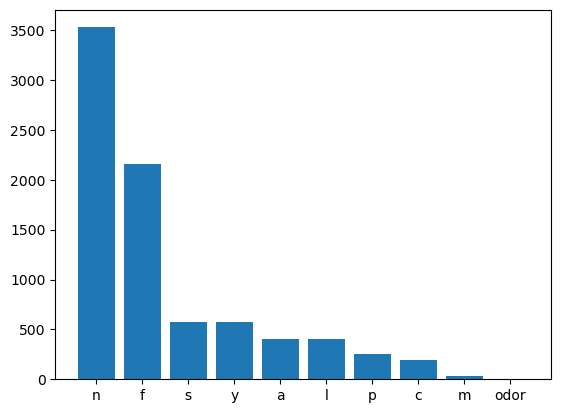

In [25]:
counts = dataset['odor'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

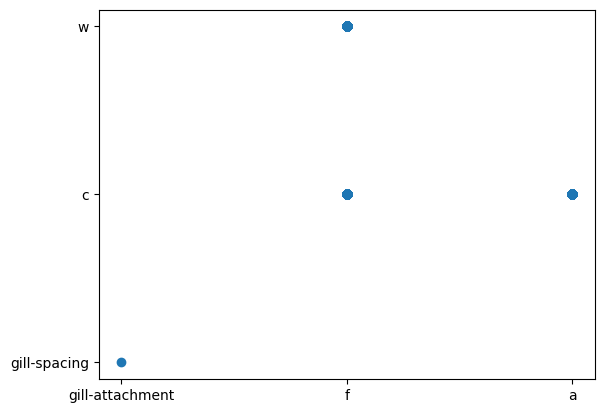

In [26]:
plt.scatter(dataset["gill-attachment"],dataset["gill-spacing"])
plt.show()

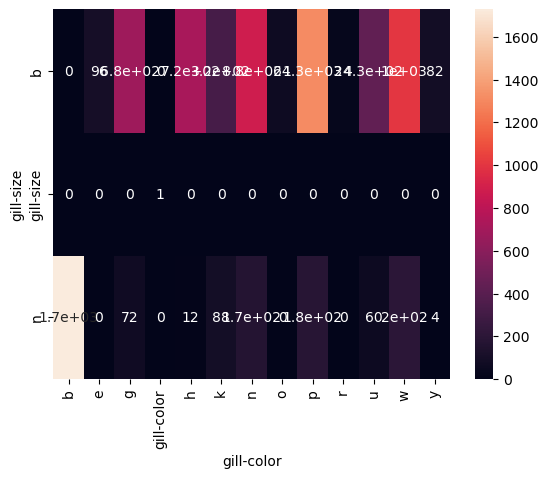

In [27]:
ct = pd.crosstab(dataset["gill-size"],dataset["gill-color"])
sns.heatmap(ct, annot=True)
plt.show()

In [28]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [29]:
print(dataset.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0  class  cap-shape            0  cap-color  bruises  odor  gill-attachment   
1      p          x            3          n        t     p                f   
2      e          x            3          y        t     a                f   
3      e          b            3          w        t     l                f   
4      p          x            4          w        t     p                f   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0  gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring   
1             c          n           k  ...                         s   
2             c          b           k  ...                         s   
3             c          b           n  ...                         s   
4             c          n           n  ...                         s   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0  stalk-c

In [30]:
from sklearn.compose import ColumnTransformer
x = dataset.drop('class',axis=1)
y = dataset['class']

col =ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), x.columns)
], remainder='passthrough')
x = col.fit_transform(x)

In [31]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 178750 stored elements and shape (8125, 139)>
  Coords	Values
  (0, 2)	1.0
  (0, 7)	1.0
  (0, 14)	1.0
  (0, 23)	1.0
  (0, 32)	1.0
  (0, 38)	1.0
  (0, 40)	1.0
  (0, 43)	1.0
  (0, 48)	1.0
  (0, 59)	1.0
  (0, 66)	1.0
  (0, 70)	1.0
  (0, 75)	1.0
  (0, 84)	1.0
  (0, 94)	1.0
  (0, 98)	1.0
  (0, 101)	1.0
  (0, 106)	1.0
  (0, 113)	1.0
  (0, 120)	1.0
  (0, 127)	1.0
  (0, 133)	1.0
  (1, 6)	1.0
  (1, 10)	1.0
  (1, 17)	1.0
  :	:
  (8123, 122)	1.0
  (8123, 129)	1.0
  (8123, 134)	1.0
  (8124, 6)	1.0
  (8124, 10)	1.0
  (8124, 17)	1.0
  (8124, 24)	1.0
  (8124, 31)	1.0
  (8124, 36)	1.0
  (8124, 39)	1.0
  (8124, 42)	1.0
  (8124, 57)	1.0
  (8124, 58)	1.0
  (8124, 61)	1.0
  (8124, 69)	1.0
  (8124, 74)	1.0
  (8124, 82)	1.0
  (8124, 92)	1.0
  (8124, 97)	1.0
  (8124, 100)	1.0
  (8124, 105)	1.0
  (8124, 112)	1.0
  (8124, 118)	1.0
  (8124, 125)	1.0
  (8124, 134)	1.0


In [32]:
le = LabelEncoder()
y = dataset['class']
y = le.fit_transform(y)
print(y)

[0 2 1 ... 1 2 1]


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
model = LogisticRegression()
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
print("Logistic Regression: ", accuracy_score(y_test, pred))
print("confusion matrix:\n" , confusion_matrix(y_test, pred))

Logistic Regression:  0.9987694831829368
confusion matrix:
 [[   0    0    1]
 [   0 1233    0]
 [   0    2 1202]]


In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
model = SVC()
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
print("SVC: ", accuracy_score(y_test, pred))
print("confusion matrix:\n" , confusion_matrix(y_test, pred))

SVC:  1.0
confusion matrix:
 [[1236    0]
 [   0 1202]]


In [35]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("Random Forest: ", accuracy_score(y_test, pred))
print("confusion matrix:\n" , confusion_matrix(y_test, pred))

Random Forest:  1.0
confusion matrix:
 [[1249    0]
 [   0 1189]]


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
model = KNeighborsClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("KNeighbors: ", accuracy_score(y_test, pred))
print("confusion matrix:\n" , confusion_matrix(y_test, pred))

KNeighbors:  1.0
confusion matrix:
 [[1271    0]
 [   0 1167]]


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("DecisionTreeClassifier: ", accuracy_score(y_test, pred))
print("confusion matrix:\n" , confusion_matrix(y_test, pred))

DecisionTreeClassifier:  0.9995898277276456
confusion matrix:
 [[   0    0    1]
 [   0 1269    0]
 [   0    0 1168]]


In [39]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle= True, random_state=40)
for train_index, test_index in skf.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [   2    3    6 ... 8122 8123 8124] TEST: [   0    1    4 ... 8090 8096 8110]
TRAIN: [   0    1    2 ... 8121 8122 8123] TEST: [   3    8   15 ... 8109 8116 8124]
TRAIN: [   0    1    2 ... 8122 8123 8124] TEST: [  13   27   33 ... 8117 8118 8119]
TRAIN: [   0    1    3 ... 8121 8123 8124] TEST: [   2    6    9 ... 8115 8120 8122]
TRAIN: [   0    1    2 ... 8120 8122 8124] TEST: [   7   17   18 ... 8114 8121 8123]
